In [1]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

In [15]:
n_epochs = 1000
learning_rate = 0.01
log_interval = 20

random_seed = 1
torch.manual_seed(random_seed)
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")

In [16]:
from dataloader import get_dataloaders

batch_size_train = 1028
batch_size_test = 1000
train_loader, test_loader = get_dataloaders(1000, 200, batch_size_train,
                                            batch_size_test)

### Vanilla SGD

In [ ]:
from models import (Four_Layer, Eight_Layer, VGG16_custom, Four_Layer_SG, Eight_Layer_SG, VGG16_SG)


import numpy as np


def train(model, epoch):
    model.train()
    model.cuda()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


#             train_counter.append((batch_idx * 64) +
#                                  ((epoch - 1) * len(train_loader.dataset)))


def test(model):
    test_losses = []
    test_acc = []

    model.eval()
    model.cpu()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.cpu(), target.cpu()
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    test_acc.append(test_accuracy.item())
    test_losses.append(test_loss)

    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy))
    return test_acc

def train_sg(model, epoch):
    model.train()
    model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=.01)
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data,target)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.data.item()))

# train_counter = []
# test_counter = [i * len(train_loader.dataset) for i in range(n_epochs + 1)]
history = {}

model_dict = {
    'Four_layer': Four_Layer,
    'Eight_Layer': Eight_Layer,
    'VGG16': VGG16_custom,
    'Four_Layer_SG': Four_Layer_SG,
    'Eight_Layer_SG': Eight_Layer_SG,
    'VGG16_SG': VGG16_SG
}

for key in model_dict.keys():
    model = model_dict[key]()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    stats = []
    test(model)
    for epoch in range(1, n_epochs + 1):
        if 'SG' not in key:
            train(model, epoch)
        else:
            train_sg(model, epoch)
        test_acc = test(model)
            
        stats.append(test_acc)
    history[key] = stats
    #clear gpu memory
    torch.cuda.empty_cache()


Test set: Avg. loss: 2.3020, Accuracy: 24/200 (12%)

Train Epoch: 1 [0/1000 (0%)]	Loss: 2.298067

Test set: Avg. loss: 2.2520, Accuracy: 29/200 (14%)

Train Epoch: 2 [0/1000 (0%)]	Loss: 2.238867

Test set: Avg. loss: 2.2084, Accuracy: 43/200 (22%)

Train Epoch: 3 [0/1000 (0%)]	Loss: 2.187943

Test set: Avg. loss: 2.1668, Accuracy: 58/200 (29%)

Train Epoch: 4 [0/1000 (0%)]	Loss: 2.140616

Test set: Avg. loss: 2.1261, Accuracy: 73/200 (36%)

Train Epoch: 5 [0/1000 (0%)]	Loss: 2.094994

Test set: Avg. loss: 2.0852, Accuracy: 93/200 (46%)

Train Epoch: 6 [0/1000 (0%)]	Loss: 2.049814

Test set: Avg. loss: 2.0439, Accuracy: 97/200 (48%)

Train Epoch: 7 [0/1000 (0%)]	Loss: 2.004820

Test set: Avg. loss: 2.0029, Accuracy: 107/200 (54%)

Train Epoch: 8 [0/1000 (0%)]	Loss: 1.960013

Test set: Avg. loss: 1.9616, Accuracy: 113/200 (56%)

Train Epoch: 9 [0/1000 (0%)]	Loss: 1.915507

Test set: Avg. loss: 1.9207, Accuracy: 119/200 (60%)

Train Epoch: 10 [0/1000 (0%)]	Loss: 1.871255

Test set: Avg. 

Train Epoch: 83 [0/1000 (0%)]	Loss: 0.484731

Test set: Avg. loss: 0.5696, Accuracy: 173/200 (86%)

Train Epoch: 84 [0/1000 (0%)]	Loss: 0.480509

Test set: Avg. loss: 0.5650, Accuracy: 173/200 (86%)

Train Epoch: 85 [0/1000 (0%)]	Loss: 0.476386

Test set: Avg. loss: 0.5606, Accuracy: 174/200 (87%)

Train Epoch: 86 [0/1000 (0%)]	Loss: 0.472372

Test set: Avg. loss: 0.5562, Accuracy: 175/200 (88%)

Train Epoch: 87 [0/1000 (0%)]	Loss: 0.468456

Test set: Avg. loss: 0.5520, Accuracy: 175/200 (88%)

Train Epoch: 88 [0/1000 (0%)]	Loss: 0.464623

Test set: Avg. loss: 0.5478, Accuracy: 175/200 (88%)

Train Epoch: 89 [0/1000 (0%)]	Loss: 0.460876

Test set: Avg. loss: 0.5437, Accuracy: 175/200 (88%)

Train Epoch: 90 [0/1000 (0%)]	Loss: 0.457212

Test set: Avg. loss: 0.5398, Accuracy: 175/200 (88%)

Train Epoch: 91 [0/1000 (0%)]	Loss: 0.453639

Test set: Avg. loss: 0.5359, Accuracy: 175/200 (88%)

Train Epoch: 92 [0/1000 (0%)]	Loss: 0.450154

Test set: Avg. loss: 0.5320, Accuracy: 175/200 (88%)



Train Epoch: 165 [0/1000 (0%)]	Loss: 0.305311

Test set: Avg. loss: 0.3698, Accuracy: 182/200 (91%)

Train Epoch: 166 [0/1000 (0%)]	Loss: 0.304121

Test set: Avg. loss: 0.3685, Accuracy: 182/200 (91%)

Train Epoch: 167 [0/1000 (0%)]	Loss: 0.302920

Test set: Avg. loss: 0.3672, Accuracy: 182/200 (91%)

Train Epoch: 168 [0/1000 (0%)]	Loss: 0.301739

Test set: Avg. loss: 0.3660, Accuracy: 182/200 (91%)

Train Epoch: 169 [0/1000 (0%)]	Loss: 0.300572

Test set: Avg. loss: 0.3647, Accuracy: 182/200 (91%)

Train Epoch: 170 [0/1000 (0%)]	Loss: 0.299410

Test set: Avg. loss: 0.3634, Accuracy: 181/200 (90%)

Train Epoch: 171 [0/1000 (0%)]	Loss: 0.298258

Test set: Avg. loss: 0.3622, Accuracy: 181/200 (90%)

Train Epoch: 172 [0/1000 (0%)]	Loss: 0.297109

Test set: Avg. loss: 0.3610, Accuracy: 181/200 (90%)

Train Epoch: 173 [0/1000 (0%)]	Loss: 0.295989

Test set: Avg. loss: 0.3598, Accuracy: 181/200 (90%)

Train Epoch: 174 [0/1000 (0%)]	Loss: 0.294866

Test set: Avg. loss: 0.3586, Accuracy: 181/2

Train Epoch: 247 [0/1000 (0%)]	Loss: 0.231179

Test set: Avg. loss: 0.2959, Accuracy: 185/200 (92%)

Train Epoch: 248 [0/1000 (0%)]	Loss: 0.230477

Test set: Avg. loss: 0.2953, Accuracy: 184/200 (92%)

Train Epoch: 249 [0/1000 (0%)]	Loss: 0.229788

Test set: Avg. loss: 0.2947, Accuracy: 184/200 (92%)

Train Epoch: 250 [0/1000 (0%)]	Loss: 0.229101

Test set: Avg. loss: 0.2941, Accuracy: 184/200 (92%)

Train Epoch: 251 [0/1000 (0%)]	Loss: 0.228417

Test set: Avg. loss: 0.2935, Accuracy: 184/200 (92%)

Train Epoch: 252 [0/1000 (0%)]	Loss: 0.227727

Test set: Avg. loss: 0.2929, Accuracy: 184/200 (92%)

Train Epoch: 253 [0/1000 (0%)]	Loss: 0.227056

Test set: Avg. loss: 0.2923, Accuracy: 184/200 (92%)

Train Epoch: 254 [0/1000 (0%)]	Loss: 0.226387

Test set: Avg. loss: 0.2917, Accuracy: 184/200 (92%)

Train Epoch: 255 [0/1000 (0%)]	Loss: 0.225700

Test set: Avg. loss: 0.2911, Accuracy: 184/200 (92%)

Train Epoch: 256 [0/1000 (0%)]	Loss: 0.225035

Test set: Avg. loss: 0.2906, Accuracy: 184/2

Train Epoch: 329 [0/1000 (0%)]	Loss: 0.183086

Test set: Avg. loss: 0.2594, Accuracy: 185/200 (92%)

Train Epoch: 330 [0/1000 (0%)]	Loss: 0.182600

Test set: Avg. loss: 0.2591, Accuracy: 185/200 (92%)

Train Epoch: 331 [0/1000 (0%)]	Loss: 0.182097

Test set: Avg. loss: 0.2588, Accuracy: 185/200 (92%)

Train Epoch: 332 [0/1000 (0%)]	Loss: 0.181615

Test set: Avg. loss: 0.2585, Accuracy: 185/200 (92%)

Train Epoch: 333 [0/1000 (0%)]	Loss: 0.181120

Test set: Avg. loss: 0.2581, Accuracy: 185/200 (92%)

Train Epoch: 334 [0/1000 (0%)]	Loss: 0.180637

Test set: Avg. loss: 0.2579, Accuracy: 185/200 (92%)

Train Epoch: 335 [0/1000 (0%)]	Loss: 0.180156

Test set: Avg. loss: 0.2575, Accuracy: 185/200 (92%)

Train Epoch: 336 [0/1000 (0%)]	Loss: 0.179671

Test set: Avg. loss: 0.2572, Accuracy: 185/200 (92%)

Train Epoch: 337 [0/1000 (0%)]	Loss: 0.179197

Test set: Avg. loss: 0.2569, Accuracy: 185/200 (92%)

Train Epoch: 338 [0/1000 (0%)]	Loss: 0.178717

Test set: Avg. loss: 0.2566, Accuracy: 185/2

Train Epoch: 411 [0/1000 (0%)]	Loss: 0.147793

Test set: Avg. loss: 0.2385, Accuracy: 185/200 (92%)

Train Epoch: 412 [0/1000 (0%)]	Loss: 0.147420

Test set: Avg. loss: 0.2383, Accuracy: 185/200 (92%)

Train Epoch: 413 [0/1000 (0%)]	Loss: 0.147047

Test set: Avg. loss: 0.2381, Accuracy: 185/200 (92%)

Train Epoch: 414 [0/1000 (0%)]	Loss: 0.146676

Test set: Avg. loss: 0.2380, Accuracy: 185/200 (92%)

Train Epoch: 415 [0/1000 (0%)]	Loss: 0.146304

Test set: Avg. loss: 0.2377, Accuracy: 185/200 (92%)

Train Epoch: 416 [0/1000 (0%)]	Loss: 0.145939

Test set: Avg. loss: 0.2375, Accuracy: 185/200 (92%)

Train Epoch: 417 [0/1000 (0%)]	Loss: 0.145552

Test set: Avg. loss: 0.2374, Accuracy: 185/200 (92%)

Train Epoch: 418 [0/1000 (0%)]	Loss: 0.145195

Test set: Avg. loss: 0.2371, Accuracy: 185/200 (92%)

Train Epoch: 419 [0/1000 (0%)]	Loss: 0.144829

Test set: Avg. loss: 0.2370, Accuracy: 185/200 (92%)

Train Epoch: 420 [0/1000 (0%)]	Loss: 0.144469

Test set: Avg. loss: 0.2368, Accuracy: 185/2

Train Epoch: 493 [0/1000 (0%)]	Loss: 0.120507

Test set: Avg. loss: 0.2252, Accuracy: 185/200 (92%)

Train Epoch: 494 [0/1000 (0%)]	Loss: 0.120228

Test set: Avg. loss: 0.2251, Accuracy: 185/200 (92%)

Train Epoch: 495 [0/1000 (0%)]	Loss: 0.119922

Test set: Avg. loss: 0.2250, Accuracy: 185/200 (92%)

Train Epoch: 496 [0/1000 (0%)]	Loss: 0.119631

Test set: Avg. loss: 0.2248, Accuracy: 185/200 (92%)

Train Epoch: 497 [0/1000 (0%)]	Loss: 0.119338

Test set: Avg. loss: 0.2247, Accuracy: 185/200 (92%)

Train Epoch: 498 [0/1000 (0%)]	Loss: 0.119047

Test set: Avg. loss: 0.2246, Accuracy: 185/200 (92%)

Train Epoch: 499 [0/1000 (0%)]	Loss: 0.118758

Test set: Avg. loss: 0.2245, Accuracy: 185/200 (92%)

Train Epoch: 500 [0/1000 (0%)]	Loss: 0.118478

Test set: Avg. loss: 0.2243, Accuracy: 185/200 (92%)

Train Epoch: 501 [0/1000 (0%)]	Loss: 0.118178

Test set: Avg. loss: 0.2242, Accuracy: 185/200 (92%)

Train Epoch: 502 [0/1000 (0%)]	Loss: 0.117890

Test set: Avg. loss: 0.2241, Accuracy: 185/2

Train Epoch: 575 [0/1000 (0%)]	Loss: 0.098993

Test set: Avg. loss: 0.2168, Accuracy: 187/200 (94%)

Train Epoch: 576 [0/1000 (0%)]	Loss: 0.098755

Test set: Avg. loss: 0.2167, Accuracy: 188/200 (94%)

Train Epoch: 577 [0/1000 (0%)]	Loss: 0.098527

Test set: Avg. loss: 0.2167, Accuracy: 187/200 (94%)

Train Epoch: 578 [0/1000 (0%)]	Loss: 0.098300

Test set: Avg. loss: 0.2166, Accuracy: 187/200 (94%)

Train Epoch: 579 [0/1000 (0%)]	Loss: 0.098070

Test set: Avg. loss: 0.2165, Accuracy: 188/200 (94%)

Train Epoch: 580 [0/1000 (0%)]	Loss: 0.097829

Test set: Avg. loss: 0.2164, Accuracy: 188/200 (94%)

Train Epoch: 581 [0/1000 (0%)]	Loss: 0.097605

Test set: Avg. loss: 0.2163, Accuracy: 188/200 (94%)

Train Epoch: 582 [0/1000 (0%)]	Loss: 0.097388

Test set: Avg. loss: 0.2163, Accuracy: 188/200 (94%)

Train Epoch: 583 [0/1000 (0%)]	Loss: 0.097154

Test set: Avg. loss: 0.2162, Accuracy: 188/200 (94%)

Train Epoch: 584 [0/1000 (0%)]	Loss: 0.096926

Test set: Avg. loss: 0.2161, Accuracy: 188/2

Train Epoch: 657 [0/1000 (0%)]	Loss: 0.081929

Test set: Avg. loss: 0.2111, Accuracy: 189/200 (94%)

Train Epoch: 658 [0/1000 (0%)]	Loss: 0.081742

Test set: Avg. loss: 0.2111, Accuracy: 189/200 (94%)

Train Epoch: 659 [0/1000 (0%)]	Loss: 0.081559

Test set: Avg. loss: 0.2110, Accuracy: 189/200 (94%)

Train Epoch: 660 [0/1000 (0%)]	Loss: 0.081374

Test set: Avg. loss: 0.2110, Accuracy: 189/200 (94%)

Train Epoch: 661 [0/1000 (0%)]	Loss: 0.081190

Test set: Avg. loss: 0.2109, Accuracy: 189/200 (94%)

Train Epoch: 662 [0/1000 (0%)]	Loss: 0.081005

Test set: Avg. loss: 0.2109, Accuracy: 189/200 (94%)

Train Epoch: 663 [0/1000 (0%)]	Loss: 0.080820

Test set: Avg. loss: 0.2108, Accuracy: 189/200 (94%)

Train Epoch: 664 [0/1000 (0%)]	Loss: 0.080635

Test set: Avg. loss: 0.2108, Accuracy: 189/200 (94%)

Train Epoch: 665 [0/1000 (0%)]	Loss: 0.080452

Test set: Avg. loss: 0.2107, Accuracy: 189/200 (94%)

Train Epoch: 666 [0/1000 (0%)]	Loss: 0.080270

Test set: Avg. loss: 0.2106, Accuracy: 189/2

Train Epoch: 739 [0/1000 (0%)]	Loss: 0.068180

Test set: Avg. loss: 0.2075, Accuracy: 188/200 (94%)

Train Epoch: 740 [0/1000 (0%)]	Loss: 0.068035

Test set: Avg. loss: 0.2075, Accuracy: 188/200 (94%)

Train Epoch: 741 [0/1000 (0%)]	Loss: 0.067886

Test set: Avg. loss: 0.2075, Accuracy: 188/200 (94%)

Train Epoch: 742 [0/1000 (0%)]	Loss: 0.067736

Test set: Avg. loss: 0.2074, Accuracy: 188/200 (94%)

Train Epoch: 743 [0/1000 (0%)]	Loss: 0.067581

Test set: Avg. loss: 0.2074, Accuracy: 188/200 (94%)

Train Epoch: 744 [0/1000 (0%)]	Loss: 0.067435

Test set: Avg. loss: 0.2073, Accuracy: 188/200 (94%)

Train Epoch: 745 [0/1000 (0%)]	Loss: 0.067283

Test set: Avg. loss: 0.2073, Accuracy: 188/200 (94%)

Train Epoch: 746 [0/1000 (0%)]	Loss: 0.067137

Test set: Avg. loss: 0.2073, Accuracy: 188/200 (94%)

Train Epoch: 747 [0/1000 (0%)]	Loss: 0.066989

Test set: Avg. loss: 0.2073, Accuracy: 188/200 (94%)

Train Epoch: 748 [0/1000 (0%)]	Loss: 0.066848

Test set: Avg. loss: 0.2072, Accuracy: 188/2

Train Epoch: 821 [0/1000 (0%)]	Loss: 0.057088

Test set: Avg. loss: 0.2053, Accuracy: 188/200 (94%)

Train Epoch: 822 [0/1000 (0%)]	Loss: 0.056969

Test set: Avg. loss: 0.2053, Accuracy: 188/200 (94%)

Train Epoch: 823 [0/1000 (0%)]	Loss: 0.056847

Test set: Avg. loss: 0.2053, Accuracy: 188/200 (94%)

Train Epoch: 824 [0/1000 (0%)]	Loss: 0.056727

Test set: Avg. loss: 0.2052, Accuracy: 188/200 (94%)

Train Epoch: 825 [0/1000 (0%)]	Loss: 0.056609

Test set: Avg. loss: 0.2052, Accuracy: 188/200 (94%)

Train Epoch: 826 [0/1000 (0%)]	Loss: 0.056490

Test set: Avg. loss: 0.2052, Accuracy: 188/200 (94%)

Train Epoch: 827 [0/1000 (0%)]	Loss: 0.056370

Test set: Avg. loss: 0.2052, Accuracy: 188/200 (94%)

Train Epoch: 828 [0/1000 (0%)]	Loss: 0.056249

Test set: Avg. loss: 0.2051, Accuracy: 188/200 (94%)

Train Epoch: 829 [0/1000 (0%)]	Loss: 0.056124

Test set: Avg. loss: 0.2051, Accuracy: 188/200 (94%)

Train Epoch: 830 [0/1000 (0%)]	Loss: 0.056010

Test set: Avg. loss: 0.2051, Accuracy: 188/2

Train Epoch: 903 [0/1000 (0%)]	Loss: 0.048129

Test set: Avg. loss: 0.2037, Accuracy: 187/200 (94%)

Train Epoch: 904 [0/1000 (0%)]	Loss: 0.048029

Test set: Avg. loss: 0.2037, Accuracy: 187/200 (94%)

Train Epoch: 905 [0/1000 (0%)]	Loss: 0.047934

Test set: Avg. loss: 0.2036, Accuracy: 187/200 (94%)

Train Epoch: 906 [0/1000 (0%)]	Loss: 0.047835

Test set: Avg. loss: 0.2036, Accuracy: 187/200 (94%)

Train Epoch: 907 [0/1000 (0%)]	Loss: 0.047737

Test set: Avg. loss: 0.2037, Accuracy: 187/200 (94%)

Train Epoch: 908 [0/1000 (0%)]	Loss: 0.047644

Test set: Avg. loss: 0.2036, Accuracy: 187/200 (94%)

Train Epoch: 909 [0/1000 (0%)]	Loss: 0.047545

Test set: Avg. loss: 0.2036, Accuracy: 187/200 (94%)

Train Epoch: 910 [0/1000 (0%)]	Loss: 0.047445

Test set: Avg. loss: 0.2036, Accuracy: 187/200 (94%)

Train Epoch: 911 [0/1000 (0%)]	Loss: 0.047355

Test set: Avg. loss: 0.2036, Accuracy: 187/200 (94%)

Train Epoch: 912 [0/1000 (0%)]	Loss: 0.047260

Test set: Avg. loss: 0.2035, Accuracy: 187/2

Train Epoch: 985 [0/1000 (0%)]	Loss: 0.040903

Test set: Avg. loss: 0.2025, Accuracy: 188/200 (94%)

Train Epoch: 986 [0/1000 (0%)]	Loss: 0.040828

Test set: Avg. loss: 0.2025, Accuracy: 188/200 (94%)

Train Epoch: 987 [0/1000 (0%)]	Loss: 0.040749

Test set: Avg. loss: 0.2025, Accuracy: 188/200 (94%)

Train Epoch: 988 [0/1000 (0%)]	Loss: 0.040666

Test set: Avg. loss: 0.2024, Accuracy: 188/200 (94%)

Train Epoch: 989 [0/1000 (0%)]	Loss: 0.040591

Test set: Avg. loss: 0.2025, Accuracy: 188/200 (94%)

Train Epoch: 990 [0/1000 (0%)]	Loss: 0.040512

Test set: Avg. loss: 0.2024, Accuracy: 188/200 (94%)

Train Epoch: 991 [0/1000 (0%)]	Loss: 0.040436

Test set: Avg. loss: 0.2024, Accuracy: 188/200 (94%)

Train Epoch: 992 [0/1000 (0%)]	Loss: 0.040358

Test set: Avg. loss: 0.2024, Accuracy: 188/200 (94%)

Train Epoch: 993 [0/1000 (0%)]	Loss: 0.040280

Test set: Avg. loss: 0.2024, Accuracy: 188/200 (94%)

Train Epoch: 994 [0/1000 (0%)]	Loss: 0.040206

Test set: Avg. loss: 0.2024, Accuracy: 188/2

Train Epoch: 68 [0/1000 (0%)]	Loss: 2.305085

Test set: Avg. loss: 2.3073, Accuracy: 16/200 (8%)

Train Epoch: 69 [0/1000 (0%)]	Loss: 2.305034

Test set: Avg. loss: 2.3072, Accuracy: 16/200 (8%)

Train Epoch: 70 [0/1000 (0%)]	Loss: 2.304984

Test set: Avg. loss: 2.3071, Accuracy: 16/200 (8%)

Train Epoch: 71 [0/1000 (0%)]	Loss: 2.304934

Test set: Avg. loss: 2.3071, Accuracy: 16/200 (8%)

Train Epoch: 72 [0/1000 (0%)]	Loss: 2.304883

Test set: Avg. loss: 2.3070, Accuracy: 16/200 (8%)

Train Epoch: 73 [0/1000 (0%)]	Loss: 2.304834

Test set: Avg. loss: 2.3069, Accuracy: 16/200 (8%)

Train Epoch: 74 [0/1000 (0%)]	Loss: 2.304783

Test set: Avg. loss: 2.3069, Accuracy: 16/200 (8%)

Train Epoch: 75 [0/1000 (0%)]	Loss: 2.304734

Test set: Avg. loss: 2.3068, Accuracy: 16/200 (8%)

Train Epoch: 76 [0/1000 (0%)]	Loss: 2.304685

Test set: Avg. loss: 2.3067, Accuracy: 16/200 (8%)

Train Epoch: 77 [0/1000 (0%)]	Loss: 2.304633

Test set: Avg. loss: 2.3067, Accuracy: 16/200 (8%)

Train Epoch: 78 [0/1

Train Epoch: 152 [0/1000 (0%)]	Loss: 2.300864

Test set: Avg. loss: 2.3019, Accuracy: 16/200 (8%)

Train Epoch: 153 [0/1000 (0%)]	Loss: 2.300812

Test set: Avg. loss: 2.3018, Accuracy: 16/200 (8%)

Train Epoch: 154 [0/1000 (0%)]	Loss: 2.300759

Test set: Avg. loss: 2.3018, Accuracy: 16/200 (8%)

Train Epoch: 155 [0/1000 (0%)]	Loss: 2.300707

Test set: Avg. loss: 2.3017, Accuracy: 16/200 (8%)

Train Epoch: 156 [0/1000 (0%)]	Loss: 2.300653

Test set: Avg. loss: 2.3016, Accuracy: 16/200 (8%)

Train Epoch: 157 [0/1000 (0%)]	Loss: 2.300602

Test set: Avg. loss: 2.3016, Accuracy: 16/200 (8%)

Train Epoch: 158 [0/1000 (0%)]	Loss: 2.300548

Test set: Avg. loss: 2.3015, Accuracy: 16/200 (8%)

Train Epoch: 159 [0/1000 (0%)]	Loss: 2.300495

Test set: Avg. loss: 2.3014, Accuracy: 16/200 (8%)

Train Epoch: 160 [0/1000 (0%)]	Loss: 2.300442

Test set: Avg. loss: 2.3014, Accuracy: 16/200 (8%)

Train Epoch: 161 [0/1000 (0%)]	Loss: 2.300389

Test set: Avg. loss: 2.3013, Accuracy: 17/200 (8%)

Train Epoc

Train Epoch: 235 [0/1000 (0%)]	Loss: 2.295904

Test set: Avg. loss: 2.2960, Accuracy: 38/200 (19%)

Train Epoch: 236 [0/1000 (0%)]	Loss: 2.295832

Test set: Avg. loss: 2.2959, Accuracy: 38/200 (19%)

Train Epoch: 237 [0/1000 (0%)]	Loss: 2.295759

Test set: Avg. loss: 2.2958, Accuracy: 38/200 (19%)

Train Epoch: 238 [0/1000 (0%)]	Loss: 2.295686

Test set: Avg. loss: 2.2957, Accuracy: 38/200 (19%)

Train Epoch: 239 [0/1000 (0%)]	Loss: 2.295612

Test set: Avg. loss: 2.2957, Accuracy: 37/200 (18%)

Train Epoch: 240 [0/1000 (0%)]	Loss: 2.295539

Test set: Avg. loss: 2.2956, Accuracy: 37/200 (18%)

Train Epoch: 241 [0/1000 (0%)]	Loss: 2.295465

Test set: Avg. loss: 2.2955, Accuracy: 37/200 (18%)

Train Epoch: 242 [0/1000 (0%)]	Loss: 2.295389

Test set: Avg. loss: 2.2954, Accuracy: 36/200 (18%)

Train Epoch: 243 [0/1000 (0%)]	Loss: 2.295314

Test set: Avg. loss: 2.2953, Accuracy: 36/200 (18%)

Train Epoch: 244 [0/1000 (0%)]	Loss: 2.295238

Test set: Avg. loss: 2.2952, Accuracy: 36/200 (18%)



Train Epoch: 317 [0/1000 (0%)]	Loss: 2.288172

Test set: Avg. loss: 2.2876, Accuracy: 33/200 (16%)

Train Epoch: 318 [0/1000 (0%)]	Loss: 2.288043

Test set: Avg. loss: 2.2874, Accuracy: 34/200 (17%)

Train Epoch: 319 [0/1000 (0%)]	Loss: 2.287911

Test set: Avg. loss: 2.2873, Accuracy: 34/200 (17%)

Train Epoch: 320 [0/1000 (0%)]	Loss: 2.287776

Test set: Avg. loss: 2.2871, Accuracy: 34/200 (17%)

Train Epoch: 321 [0/1000 (0%)]	Loss: 2.287642

Test set: Avg. loss: 2.2870, Accuracy: 35/200 (18%)

Train Epoch: 322 [0/1000 (0%)]	Loss: 2.287504

Test set: Avg. loss: 2.2869, Accuracy: 35/200 (18%)

Train Epoch: 323 [0/1000 (0%)]	Loss: 2.287366

Test set: Avg. loss: 2.2867, Accuracy: 35/200 (18%)

Train Epoch: 324 [0/1000 (0%)]	Loss: 2.287226

Test set: Avg. loss: 2.2866, Accuracy: 35/200 (18%)

Train Epoch: 325 [0/1000 (0%)]	Loss: 2.287083

Test set: Avg. loss: 2.2864, Accuracy: 36/200 (18%)

Train Epoch: 326 [0/1000 (0%)]	Loss: 2.286938

Test set: Avg. loss: 2.2863, Accuracy: 36/200 (18%)



Train Epoch: 399 [0/1000 (0%)]	Loss: 2.268379

Test set: Avg. loss: 2.2680, Accuracy: 60/200 (30%)

Train Epoch: 400 [0/1000 (0%)]	Loss: 2.267936

Test set: Avg. loss: 2.2676, Accuracy: 62/200 (31%)

Train Epoch: 401 [0/1000 (0%)]	Loss: 2.267484

Test set: Avg. loss: 2.2671, Accuracy: 62/200 (31%)

Train Epoch: 402 [0/1000 (0%)]	Loss: 2.267026

Test set: Avg. loss: 2.2667, Accuracy: 64/200 (32%)

Train Epoch: 403 [0/1000 (0%)]	Loss: 2.266557

Test set: Avg. loss: 2.2662, Accuracy: 65/200 (32%)

Train Epoch: 404 [0/1000 (0%)]	Loss: 2.266076

Test set: Avg. loss: 2.2658, Accuracy: 65/200 (32%)

Train Epoch: 405 [0/1000 (0%)]	Loss: 2.265588

Test set: Avg. loss: 2.2653, Accuracy: 64/200 (32%)

Train Epoch: 406 [0/1000 (0%)]	Loss: 2.265088

Test set: Avg. loss: 2.2648, Accuracy: 65/200 (32%)

Train Epoch: 407 [0/1000 (0%)]	Loss: 2.264577

Test set: Avg. loss: 2.2644, Accuracy: 66/200 (33%)

Train Epoch: 408 [0/1000 (0%)]	Loss: 2.264055

Test set: Avg. loss: 2.2639, Accuracy: 68/200 (34%)



Train Epoch: 481 [0/1000 (0%)]	Loss: 2.118936

Test set: Avg. loss: 2.1233, Accuracy: 120/200 (60%)

Train Epoch: 482 [0/1000 (0%)]	Loss: 2.112272

Test set: Avg. loss: 2.1167, Accuracy: 119/200 (60%)

Train Epoch: 483 [0/1000 (0%)]	Loss: 2.105216

Test set: Avg. loss: 2.1096, Accuracy: 119/200 (60%)

Train Epoch: 484 [0/1000 (0%)]	Loss: 2.097760

Test set: Avg. loss: 2.1022, Accuracy: 119/200 (60%)

Train Epoch: 485 [0/1000 (0%)]	Loss: 2.089887

Test set: Avg. loss: 2.0944, Accuracy: 120/200 (60%)

Train Epoch: 486 [0/1000 (0%)]	Loss: 2.081559

Test set: Avg. loss: 2.0860, Accuracy: 120/200 (60%)

Train Epoch: 487 [0/1000 (0%)]	Loss: 2.072756

Test set: Avg. loss: 2.0772, Accuracy: 120/200 (60%)

Train Epoch: 488 [0/1000 (0%)]	Loss: 2.063418

Test set: Avg. loss: 2.0678, Accuracy: 120/200 (60%)

Train Epoch: 489 [0/1000 (0%)]	Loss: 2.053487

Test set: Avg. loss: 2.0578, Accuracy: 120/200 (60%)

Train Epoch: 490 [0/1000 (0%)]	Loss: 2.042952

Test set: Avg. loss: 2.0472, Accuracy: 120/2

Train Epoch: 563 [0/1000 (0%)]	Loss: 0.867060

Test set: Avg. loss: 0.8681, Accuracy: 132/200 (66%)

Train Epoch: 564 [0/1000 (0%)]	Loss: 0.812714

Test set: Avg. loss: 0.7575, Accuracy: 139/200 (70%)

Train Epoch: 565 [0/1000 (0%)]	Loss: 0.774182

Test set: Avg. loss: 0.8126, Accuracy: 139/200 (70%)

Train Epoch: 566 [0/1000 (0%)]	Loss: 0.762384

Test set: Avg. loss: 0.6821, Accuracy: 153/200 (76%)

Train Epoch: 567 [0/1000 (0%)]	Loss: 0.687332

Test set: Avg. loss: 0.6983, Accuracy: 158/200 (79%)

Train Epoch: 568 [0/1000 (0%)]	Loss: 0.644364

Test set: Avg. loss: 0.6089, Accuracy: 159/200 (80%)

Train Epoch: 569 [0/1000 (0%)]	Loss: 0.602324

Test set: Avg. loss: 0.6285, Accuracy: 159/200 (80%)

Train Epoch: 570 [0/1000 (0%)]	Loss: 0.578474

Test set: Avg. loss: 0.5694, Accuracy: 165/200 (82%)

Train Epoch: 571 [0/1000 (0%)]	Loss: 0.559764

Test set: Avg. loss: 0.5975, Accuracy: 161/200 (80%)

Train Epoch: 572 [0/1000 (0%)]	Loss: 0.548684

Test set: Avg. loss: 0.5510, Accuracy: 164/2

Train Epoch: 645 [0/1000 (0%)]	Loss: 0.345807

Test set: Avg. loss: 0.3938, Accuracy: 172/200 (86%)

Train Epoch: 646 [0/1000 (0%)]	Loss: 0.355423

Test set: Avg. loss: 0.3687, Accuracy: 174/200 (87%)

Train Epoch: 647 [0/1000 (0%)]	Loss: 0.371386

Test set: Avg. loss: 0.4439, Accuracy: 169/200 (84%)

Train Epoch: 648 [0/1000 (0%)]	Loss: 0.399962

Test set: Avg. loss: 0.4378, Accuracy: 168/200 (84%)

Train Epoch: 649 [0/1000 (0%)]	Loss: 0.443183

Test set: Avg. loss: 0.5475, Accuracy: 167/200 (84%)

Train Epoch: 650 [0/1000 (0%)]	Loss: 0.499944

Test set: Avg. loss: 0.5454, Accuracy: 162/200 (81%)

Train Epoch: 651 [0/1000 (0%)]	Loss: 0.554470

Test set: Avg. loss: 0.6193, Accuracy: 160/200 (80%)

Train Epoch: 652 [0/1000 (0%)]	Loss: 0.571141

Test set: Avg. loss: 0.5143, Accuracy: 162/200 (81%)

Train Epoch: 653 [0/1000 (0%)]	Loss: 0.511068

Test set: Avg. loss: 0.4784, Accuracy: 162/200 (81%)

Train Epoch: 654 [0/1000 (0%)]	Loss: 0.428323

Test set: Avg. loss: 0.3807, Accuracy: 169/2

Train Epoch: 727 [0/1000 (0%)]	Loss: 0.217890

Test set: Avg. loss: 0.2506, Accuracy: 184/200 (92%)

Train Epoch: 728 [0/1000 (0%)]	Loss: 0.218713

Test set: Avg. loss: 0.2272, Accuracy: 185/200 (92%)

Train Epoch: 729 [0/1000 (0%)]	Loss: 0.222603

Test set: Avg. loss: 0.2575, Accuracy: 184/200 (92%)

Train Epoch: 730 [0/1000 (0%)]	Loss: 0.222927

Test set: Avg. loss: 0.2303, Accuracy: 184/200 (92%)

Train Epoch: 731 [0/1000 (0%)]	Loss: 0.227462

Test set: Avg. loss: 0.2631, Accuracy: 185/200 (92%)

Train Epoch: 732 [0/1000 (0%)]	Loss: 0.226196

Test set: Avg. loss: 0.2325, Accuracy: 183/200 (92%)

Train Epoch: 733 [0/1000 (0%)]	Loss: 0.230878

Test set: Avg. loss: 0.2645, Accuracy: 184/200 (92%)

Train Epoch: 734 [0/1000 (0%)]	Loss: 0.226533

Test set: Avg. loss: 0.2305, Accuracy: 185/200 (92%)

Train Epoch: 735 [0/1000 (0%)]	Loss: 0.229239

Test set: Avg. loss: 0.2596, Accuracy: 185/200 (92%)

Train Epoch: 736 [0/1000 (0%)]	Loss: 0.221644

Test set: Avg. loss: 0.2249, Accuracy: 184/2

Train Epoch: 809 [0/1000 (0%)]	Loss: 0.143420

Test set: Avg. loss: 0.1754, Accuracy: 191/200 (96%)

Train Epoch: 810 [0/1000 (0%)]	Loss: 0.142292

Test set: Avg. loss: 0.1747, Accuracy: 191/200 (96%)

Train Epoch: 811 [0/1000 (0%)]	Loss: 0.141200

Test set: Avg. loss: 0.1736, Accuracy: 191/200 (96%)

Train Epoch: 812 [0/1000 (0%)]	Loss: 0.140139

Test set: Avg. loss: 0.1730, Accuracy: 191/200 (96%)

Train Epoch: 813 [0/1000 (0%)]	Loss: 0.139094

Test set: Avg. loss: 0.1721, Accuracy: 191/200 (96%)

Train Epoch: 814 [0/1000 (0%)]	Loss: 0.138080

Test set: Avg. loss: 0.1716, Accuracy: 191/200 (96%)

Train Epoch: 815 [0/1000 (0%)]	Loss: 0.137074

Test set: Avg. loss: 0.1706, Accuracy: 191/200 (96%)

Train Epoch: 816 [0/1000 (0%)]	Loss: 0.136082

Test set: Avg. loss: 0.1702, Accuracy: 191/200 (96%)

Train Epoch: 817 [0/1000 (0%)]	Loss: 0.135104

Test set: Avg. loss: 0.1691, Accuracy: 191/200 (96%)

Train Epoch: 818 [0/1000 (0%)]	Loss: 0.134143

Test set: Avg. loss: 0.1687, Accuracy: 191/2

Train Epoch: 891 [0/1000 (0%)]	Loss: 0.087046

Test set: Avg. loss: 0.1408, Accuracy: 192/200 (96%)

Train Epoch: 892 [0/1000 (0%)]	Loss: 0.086658

Test set: Avg. loss: 0.1442, Accuracy: 191/200 (96%)

Train Epoch: 893 [0/1000 (0%)]	Loss: 0.086341

Test set: Avg. loss: 0.1407, Accuracy: 192/200 (96%)

Train Epoch: 894 [0/1000 (0%)]	Loss: 0.085921

Test set: Avg. loss: 0.1440, Accuracy: 191/200 (96%)

Train Epoch: 895 [0/1000 (0%)]	Loss: 0.085623

Test set: Avg. loss: 0.1405, Accuracy: 192/200 (96%)

Train Epoch: 896 [0/1000 (0%)]	Loss: 0.085287

Test set: Avg. loss: 0.1441, Accuracy: 190/200 (95%)

Train Epoch: 897 [0/1000 (0%)]	Loss: 0.085025

Test set: Avg. loss: 0.1405, Accuracy: 192/200 (96%)

Train Epoch: 898 [0/1000 (0%)]	Loss: 0.084694

Test set: Avg. loss: 0.1440, Accuracy: 190/200 (95%)

Train Epoch: 899 [0/1000 (0%)]	Loss: 0.084465

Test set: Avg. loss: 0.1408, Accuracy: 192/200 (96%)

Train Epoch: 900 [0/1000 (0%)]	Loss: 0.084198

Test set: Avg. loss: 0.1441, Accuracy: 190/2

Train Epoch: 973 [0/1000 (0%)]	Loss: 3.525762

Test set: Avg. loss: 1.3852, Accuracy: 122/200 (61%)

Train Epoch: 974 [0/1000 (0%)]	Loss: 1.369752

Test set: Avg. loss: 0.8588, Accuracy: 144/200 (72%)

Train Epoch: 975 [0/1000 (0%)]	Loss: 0.802653

Test set: Avg. loss: 0.5789, Accuracy: 167/200 (84%)

Train Epoch: 976 [0/1000 (0%)]	Loss: 0.526834

Test set: Avg. loss: 0.4665, Accuracy: 176/200 (88%)

Train Epoch: 977 [0/1000 (0%)]	Loss: 0.403648

Test set: Avg. loss: 0.4042, Accuracy: 187/200 (94%)

Train Epoch: 978 [0/1000 (0%)]	Loss: 0.338629

Test set: Avg. loss: 0.3651, Accuracy: 190/200 (95%)

Train Epoch: 979 [0/1000 (0%)]	Loss: 0.295759

Test set: Avg. loss: 0.3351, Accuracy: 190/200 (95%)

Train Epoch: 980 [0/1000 (0%)]	Loss: 0.264509

Test set: Avg. loss: 0.3116, Accuracy: 192/200 (96%)

Train Epoch: 981 [0/1000 (0%)]	Loss: 0.240804

Test set: Avg. loss: 0.2927, Accuracy: 191/200 (96%)

Train Epoch: 982 [0/1000 (0%)]	Loss: 0.222360

Test set: Avg. loss: 0.2769, Accuracy: 190/2

Train Epoch: 55 [0/1000 (0%)]	Loss: 2.361824

Test set: Avg. loss: 2.2966, Accuracy: 24/200 (12%)

Train Epoch: 56 [0/1000 (0%)]	Loss: 2.345711

Test set: Avg. loss: 2.2946, Accuracy: 24/200 (12%)

Train Epoch: 57 [0/1000 (0%)]	Loss: 2.375134

Test set: Avg. loss: 2.2949, Accuracy: 24/200 (12%)

Train Epoch: 58 [0/1000 (0%)]	Loss: 2.340651

Test set: Avg. loss: 2.2944, Accuracy: 24/200 (12%)

Train Epoch: 59 [0/1000 (0%)]	Loss: 2.355787

Test set: Avg. loss: 2.2916, Accuracy: 24/200 (12%)

Train Epoch: 60 [0/1000 (0%)]	Loss: 2.365659

Test set: Avg. loss: 2.2938, Accuracy: 24/200 (12%)

Train Epoch: 61 [0/1000 (0%)]	Loss: 2.374468

Test set: Avg. loss: 2.2935, Accuracy: 24/200 (12%)

Train Epoch: 62 [0/1000 (0%)]	Loss: 2.360659

Test set: Avg. loss: 2.2914, Accuracy: 24/200 (12%)

Train Epoch: 63 [0/1000 (0%)]	Loss: 2.357095

Test set: Avg. loss: 2.2892, Accuracy: 24/200 (12%)

Train Epoch: 64 [0/1000 (0%)]	Loss: 2.352940

Test set: Avg. loss: 2.2897, Accuracy: 25/200 (12%)

Train Epoc


Test set: Avg. loss: 2.0057, Accuracy: 60/200 (30%)

Train Epoch: 138 [0/1000 (0%)]	Loss: 2.132998

Test set: Avg. loss: 2.1916, Accuracy: 17/200 (8%)

Train Epoch: 139 [0/1000 (0%)]	Loss: 2.227281

Test set: Avg. loss: 2.1471, Accuracy: 52/200 (26%)

Train Epoch: 140 [0/1000 (0%)]	Loss: 2.257945

Test set: Avg. loss: 2.1992, Accuracy: 67/200 (34%)

Train Epoch: 141 [0/1000 (0%)]	Loss: 2.194460

Test set: Avg. loss: 1.9743, Accuracy: 72/200 (36%)

Train Epoch: 142 [0/1000 (0%)]	Loss: 2.058122

Test set: Avg. loss: 1.9277, Accuracy: 98/200 (49%)

Train Epoch: 143 [0/1000 (0%)]	Loss: 2.017903

Test set: Avg. loss: 1.9032, Accuracy: 60/200 (30%)

Train Epoch: 144 [0/1000 (0%)]	Loss: 2.015872

Test set: Avg. loss: 2.1293, Accuracy: 30/200 (15%)

Train Epoch: 145 [0/1000 (0%)]	Loss: 2.186790

Test set: Avg. loss: 2.2410, Accuracy: 45/200 (22%)

Train Epoch: 146 [0/1000 (0%)]	Loss: 2.372217

Test set: Avg. loss: 2.2742, Accuracy: 70/200 (35%)

Train Epoch: 147 [0/1000 (0%)]	Loss: 2.268794




Test set: Avg. loss: 1.3560, Accuracy: 126/200 (63%)

Train Epoch: 220 [0/1000 (0%)]	Loss: 1.291664

Test set: Avg. loss: 0.9582, Accuracy: 135/200 (68%)

Train Epoch: 221 [0/1000 (0%)]	Loss: 0.987083

Test set: Avg. loss: 0.8011, Accuracy: 147/200 (74%)

Train Epoch: 222 [0/1000 (0%)]	Loss: 0.775437

Test set: Avg. loss: 0.5991, Accuracy: 163/200 (82%)

Train Epoch: 223 [0/1000 (0%)]	Loss: 0.628007

Test set: Avg. loss: 0.5704, Accuracy: 160/200 (80%)

Train Epoch: 224 [0/1000 (0%)]	Loss: 0.555908

Test set: Avg. loss: 0.5233, Accuracy: 157/200 (78%)

Train Epoch: 225 [0/1000 (0%)]	Loss: 0.534406

Test set: Avg. loss: 0.5223, Accuracy: 160/200 (80%)

Train Epoch: 226 [0/1000 (0%)]	Loss: 0.519878

Test set: Avg. loss: 0.5583, Accuracy: 150/200 (75%)

Train Epoch: 227 [0/1000 (0%)]	Loss: 0.542777

Test set: Avg. loss: 0.6390, Accuracy: 154/200 (77%)

Train Epoch: 228 [0/1000 (0%)]	Loss: 0.670974

Test set: Avg. loss: 0.8042, Accuracy: 143/200 (72%)

Train Epoch: 229 [0/1000 (0%)]	Loss:

Train Epoch: 301 [0/1000 (0%)]	Loss: 0.139184

Test set: Avg. loss: 0.1971, Accuracy: 186/200 (93%)

Train Epoch: 302 [0/1000 (0%)]	Loss: 0.140958

Test set: Avg. loss: 0.1910, Accuracy: 188/200 (94%)

Train Epoch: 303 [0/1000 (0%)]	Loss: 0.122284

Test set: Avg. loss: 0.1850, Accuracy: 186/200 (93%)

Train Epoch: 304 [0/1000 (0%)]	Loss: 0.123795

Test set: Avg. loss: 0.1848, Accuracy: 188/200 (94%)

Train Epoch: 305 [0/1000 (0%)]	Loss: 0.116771

Test set: Avg. loss: 0.1802, Accuracy: 189/200 (94%)

Train Epoch: 306 [0/1000 (0%)]	Loss: 0.107183

Test set: Avg. loss: 0.1755, Accuracy: 189/200 (94%)

Train Epoch: 307 [0/1000 (0%)]	Loss: 0.104908

Test set: Avg. loss: 0.1731, Accuracy: 189/200 (94%)

Train Epoch: 308 [0/1000 (0%)]	Loss: 0.102763

Test set: Avg. loss: 0.1758, Accuracy: 188/200 (94%)

Train Epoch: 309 [0/1000 (0%)]	Loss: 0.110138

Test set: Avg. loss: 0.1735, Accuracy: 188/200 (94%)

Train Epoch: 310 [0/1000 (0%)]	Loss: 0.105329

Test set: Avg. loss: 0.1751, Accuracy: 188/2


Test set: Avg. loss: 0.1247, Accuracy: 189/200 (94%)

Train Epoch: 383 [0/1000 (0%)]	Loss: 0.025199

Test set: Avg. loss: 0.1214, Accuracy: 191/200 (96%)

Train Epoch: 384 [0/1000 (0%)]	Loss: 0.025473

Test set: Avg. loss: 0.1292, Accuracy: 190/200 (95%)

Train Epoch: 385 [0/1000 (0%)]	Loss: 0.025772

Test set: Avg. loss: 0.1247, Accuracy: 189/200 (94%)

Train Epoch: 386 [0/1000 (0%)]	Loss: 0.019767

Test set: Avg. loss: 0.1254, Accuracy: 191/200 (96%)

Train Epoch: 387 [0/1000 (0%)]	Loss: 0.023493

Test set: Avg. loss: 0.1273, Accuracy: 190/200 (95%)

Train Epoch: 388 [0/1000 (0%)]	Loss: 0.017391

Test set: Avg. loss: 0.1247, Accuracy: 190/200 (95%)

Train Epoch: 389 [0/1000 (0%)]	Loss: 0.020190

Test set: Avg. loss: 0.1252, Accuracy: 191/200 (96%)

Train Epoch: 390 [0/1000 (0%)]	Loss: 0.017401

Test set: Avg. loss: 0.1242, Accuracy: 190/200 (95%)

Train Epoch: 391 [0/1000 (0%)]	Loss: 0.019338

Test set: Avg. loss: 0.1252, Accuracy: 191/200 (96%)

Train Epoch: 392 [0/1000 (0%)]	Loss:

SyntaxError: invalid syntax (<ipython-input-4-2a3930044ba4>, line 1)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

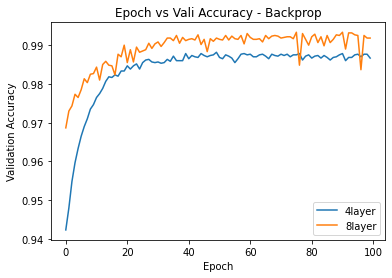

In [46]:
sns.lineplot(x = range(EPOCHS), y = logs['four_layer'].history['val_accuracy'], label = '4layer')
sns.lineplot(x = range(EPOCHS), y = logs['eight_layer'].history['val_accuracy'], label = '8layer')
# sns.lineplot(x = range(EPOCHS), y = logs['vgg16'].history['val_accuracy'], label = 'vgg16')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Epoch vs Vali Accuracy - Backprop')
plt.legend()
plt.show()
